In [13]:
import pandas as pd
import numpy as np
from collections import OrderedDict
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Final_data.csv")
df.head()

,Unnamed: 0,bed,bath,acre_lot,city,state,ALand,house_size,State_ab,Type,Average(Area Income),prone_to_natural_disasters,house_age,Old_Selling_Price,new_selling_price
0,0,7.0,3.0,0.09,Dorado,Puerto Rico,2859549.0,1192.0,1,3,58507.0,0,4,110000.0,157154.3
1,1,7.0,3.0,0.09,Dorado,Puerto Rico,5745207.0,1192.0,0,3,81277.0,0,4,110000.0,157154.3
2,2,7.0,3.0,0.09,Dorado,Puerto Rico,1678138.0,1192.0,1,3,16468.0,0,4,110000.0,157154.3
3,3,7.0,3.0,0.09,Dorado,Puerto Rico,1258340.0,1192.0,1,3,46149.0,0,4,110000.0,157154.3
4,4,5.0,4.0,0.99,Saint Thomas,Virgin Islands,72079712.0,5000.0,1,3,81043.0,1,10,950000.0,1778798.8


In [3]:
df = df.drop(columns='Unnamed: 0',axis=1)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
def custom_summary(df): 
    
    result = []
    
    for col in df.columns:
        
        if df[col].dtype != 'O':
        
            stats = OrderedDict ({
                'Feature_Name' : col,
                'Count':df[col].count(),
                'Minimum':df[col].min(),
                'Quarter 1':df[col].quantile(0.25), 
                "Mean":df[col].mean(),
                'Median':df[col].median(),
                'Quarter 3':df[col].quantile(0.75),
                'Maximum':df[col].max(),
                "Variance":df[col].var(),
                'Standard Deviation':df[col].std(),
                "Kurtosis":df[col].kurt(),
                'Skewness':df[col].skew() ,
                'IQR':df[col].quantile(0.75) - df[col].quantile(0.25)
            })
            
            result.append(stats)
        
        
    result_df = pd.DataFrame(result)
    
    skewtype =[]
    
    for i in result_df['Skewness']:
        if i<=-1:
            skewtype.append('Highly Negatively Skewed')
        elif i<= -0.5:
            skewtype.append('Moderately Negatively Skewed')
        elif -0.5 < i < 0 :
            skewtype.append('Approx Normal Distribution (-ve)')
        elif 0 <= i < 0.5:
            skewtype.append('Approx Normal Distribution (+ve)')
        elif 0.5<= i < 1:
            skewtype.append('Moderately Positively Skewed')
        elif i >= 1:
            skewtype.append('Highly Positively Skewed')
    
    result_df['Skew_Type'] = skewtype
    
    k_type = []
    
    for i in result_df['Kurtosis']:
        if i <=  -1:
            k_type.append('Highly Platykurtic Curve')
        elif -1 < i <= -0.5:#-.9 to .9
            k_type.append('Moderately Platykurtic Curve')
        elif -0.5 < i <= 0.5: #-1,-2,-3...
            k_type.append('Mesokurtic Curve')
        elif 0.5<= i < 1:
            k_type.append('Moderately Leptokurtic Curve')
        elif i >= 1:
            k_type.append('Highly Leptokurtic Curve')
            
        
    
    result_df['Kurtosis_Type'] = k_type
    
    
    #Outlier detection
    

    Upper_limit = stats['Quarter 3'] + 1.5*stats['IQR']
    
    lower_limit = stats['Quarter 1'] -1.5*stats['IQR']
    
    if len([x for x in df[col] if (x < lower_limit) or (x > Upper_limit)]) > 0:
        
        outlier_comment = 'has outliers'
        outlier_percentage = len([x for x in df[col] if (x < lower_limit) or (x > Upper_limit)])/len(df)
    else:
        oulier_comment = 'no outliers'
        
        outlier_percentage = 0
        
    result_df['outlier_comment'] = outlier_comment
    
    result_df['outlier_percentage'] = outlier_percentage
   
    return result_df

In [7]:
custom_summary(df)

,Feature_Name,Count,Minimum,Quarter 1,Mean,Median,Quarter 3,Maximum,Variance,Standard Deviation,Kurtosis,Skewness,IQR,Skew_Type,Kurtosis_Type,outlier_comment,outlier_percentage
0,bed,70731,1.00,3.00,3.649786e+00,3.00,4.00,33.0,2.614136e+00,1.616829e+00,23.339355,2.879613,1.00,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.088108
1,bath,70731,1.00,2.00,2.584256e+00,2.00,3.00,19.0,2.252688e+00,1.500896e+00,12.985410,2.603231,1.00,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.088108
2,acre_lot,70731,0.00,0.13,3.856628e+00,0.29,0.86,18817.0,4.019473e+04,2.004862e+02,8767.638916,93.467308,0.73,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.088108
3,ALand,70731,0.00,364895.00,4.243511e+06,1233689.00,3054275.00,607294625.0,2.063742e+14,1.436573e+07,846.213879,22.704564,2689380.00,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.088108
4,house_size,70731,170.00,1326.00,2.344113e+03,1874.00,2794.00,20821.0,2.921357e+06,1.709198e+03,19.198605,3.411612,1468.00,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.088108
5,State_ab,70731,0.00,1.00,1.135301e+00,1.00,1.00,5.0,6.343159e-01,7.964395e-01,8.215332,2.816120,0.00,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.088108
6,Type,70731,0.00,3.00,2.987742e+00,3.00,3.00,4.0,2.016644e-02,1.420086e-01,170.635218,-12.640826,0.00,Highly Negatively Skewed,Highly Leptokurtic Curve,has outliers,0.088108
7,Average(Area Income),70731,0.00,52381.00,7.665431e+04,74762.00,94588.00,183195.0,1.083824e+09,3.292149e+04,0.034593,0.490625,42207.00,Approx Normal Distribution (+ve),Mesokurtic Curve,has outliers,0.088108
8,prone_to_natural_disasters,70731,0.00,0.00,4.971512e-01,0.00,1.00,1.0,2.499954e-01,4.999954e-01,-1.999927,0.011396,1.00,Approx Normal Distribution (+ve),Highly Platykurtic Curve,has outliers,0.088108
9,house_age,70731,1.00,8.00,1.645218e+01,17.00,23.00,36.0,8.437971e+01,9.185843e+00,-0.834694,0.105627,15.00,Approx Normal Distribution (+ve),Moderately Platykurtic Curve,has outliers,0.088108


In [8]:
# checking for duplicates

duplicate_rows = df.duplicated()
total_duplicates = duplicate_rows.sum()


print("Total number of duplicated rows:",total_duplicates)

Total number of duplicated rows: 0


In [10]:
encoder = LabelEncoder()

categorical_features = ['State_ab','Type']

for column in categorical_features:

    df[column] = encoder.fit_transform(df[column])

In [11]:
df.head()

,bed,bath,acre_lot,city,state,ALand,house_size,State_ab,Type,Average(Area Income),prone_to_natural_disasters,house_age,Old_Selling_Price,new_selling_price
0,7.0,3.0,0.09,Dorado,Puerto Rico,2859549.0,1192.0,1,3,58507.0,0,4,110000.0,157154.3
1,7.0,3.0,0.09,Dorado,Puerto Rico,5745207.0,1192.0,0,3,81277.0,0,4,110000.0,157154.3
2,7.0,3.0,0.09,Dorado,Puerto Rico,1678138.0,1192.0,1,3,16468.0,0,4,110000.0,157154.3
3,7.0,3.0,0.09,Dorado,Puerto Rico,1258340.0,1192.0,1,3,46149.0,0,4,110000.0,157154.3
4,5.0,4.0,0.99,Saint Thomas,Virgin Islands,72079712.0,5000.0,1,3,81043.0,1,10,950000.0,1778798.8


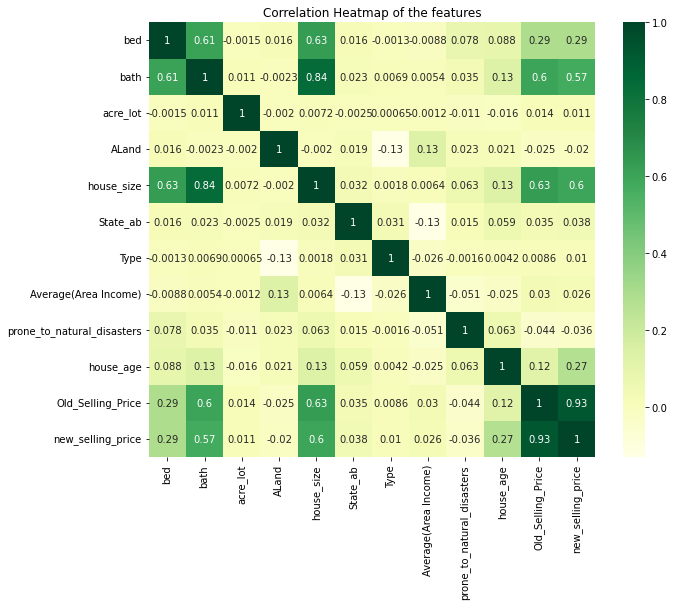

In [14]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))

sns.heatmap(correlation_matrix,annot=True,cmap="YlGn")
plt.title("Correlation Heatmap of the features")
plt.show()

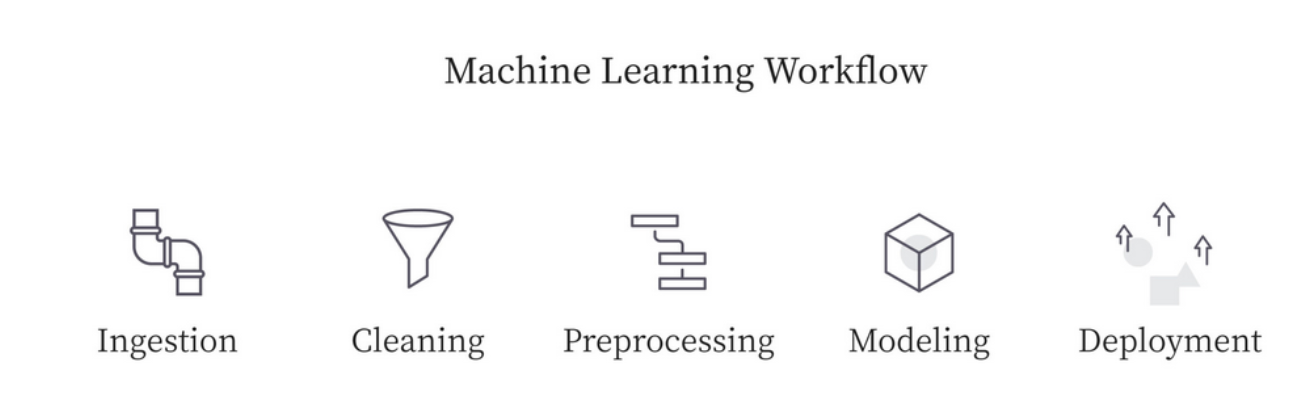

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [16]:
# splitting the data

X  = df.drop(columns=['new_selling_price','city','state'],axis=1)
Y = df[['new_selling_price']]

In [17]:
X.head()

,bed,bath,acre_lot,ALand,house_size,State_ab,Type,Average(Area Income),prone_to_natural_disasters,house_age,Old_Selling_Price
0,7.0,3.0,0.09,2859549.0,1192.0,1,3,58507.0,0,4,110000.0
1,7.0,3.0,0.09,5745207.0,1192.0,0,3,81277.0,0,4,110000.0
2,7.0,3.0,0.09,1678138.0,1192.0,1,3,16468.0,0,4,110000.0
3,7.0,3.0,0.09,1258340.0,1192.0,1,3,46149.0,0,4,110000.0
4,5.0,4.0,0.99,72079712.0,5000.0,1,3,81043.0,1,10,950000.0


In [18]:
Y.head()

,new_selling_price
0,157154.3
1,157154.3
2,157154.3
3,157154.3
4,1778798.8


In [20]:
# traning and test data
X_train , X_test ,Y_train , Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [28]:
#logistic regression pipeline

# Logistic Regression pipeline

LogisticRegressionPipeline = Pipeline([('scaler',StandardScaler()),
                                    ('logisticRegression',LogisticRegression())])


RandomForestPipeline = Pipeline([('scaler',StandardScaler()),
                                    ('randomforest',RandomForestRegressor())])

Xgboostpipeline = Pipeline([('scaler',StandardScaler()),
                                    ('randomforest',XGBRegressor())])

LGMBpipeline = Pipeline([('scaler',StandardScaler()),
                                    ('randomforest',LGBMRegressor())])

In [29]:
# defining the pipelines in a list

mypipeline = [LogisticRegressionPipeline,RandomForestPipeline,Xgboostpipeline,LGMBpipeline]


 #defining variables for chosing the best model
 
accuracy = 0.0
clasifier = 0
pipeline = ""


In [31]:


#creating a dictionary for the piplines and training all the models
 
Pipeline_dict = {0:"Logistic Regression",1:" Random Forst Regressor",2:"XGboost Regressor",3:"LGMB Regressor"}

#fitting all the pipelines into the training data
for mypipe in mypipeline:
    mypipe.fit(X_train,Y_train)



f:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'continuous'